In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def csv_to_dict(path):
    df = pd.read_csv(path)
    evac_times = {}
    panics = {}
    speeds = df['avg_speed'].unique()
    sigmas = df['sigma'].unique()
    thresholds = df['sep_threshold'].unique()
    for threshold in thresholds:
        if threshold == 1.0:
            continue
        for sigma in sigmas:
            evac_times_same_sigma = np.zeros(len(speeds), dtype=np.float64)
            panics_same_sigma = np.zeros(len(speeds), dtype=np.float64)
            for idx, speed in enumerate(speeds):
                
                evac_time = df[(df['avg_speed'] == speed) & (df['sigma'] == sigma) & (df['sep_threshold'] == threshold)]['avg_evac_time'].mean()
                panic = df[(df['avg_speed'] == speed) & (df['sigma'] == sigma) & (df['sep_threshold'] == threshold)]['avg_panic'].mean()
                evac_times_same_sigma[idx] = evac_time
                panics_same_sigma[idx] = panic
            if not np.isnan(evac_times_same_sigma[0]):
                evac_times[str(sigma*100) + '%' + ' sep threshold: ' + str(threshold)] = evac_times_same_sigma.tolist()
                panics[str(sigma*100) + '%, ' + ' sep threshold: ' + str(threshold)] = panics_same_sigma.tolist()
    return evac_times, panics, speeds


In [3]:
def get_two_dicts(path1, path2):
    evac_times1, panics1, speeds1 = csv_to_dict(path1)
    evac_times2, panics2, speeds2 = csv_to_dict(path2)
    return evac_times1, evac_times2, panics1, panics2, speeds1

In [38]:
def plot_dicts(dict1, dict2, xs):


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    for key, values in dict1.items():
        ax1.plot(xs, values, label='speed diff:+-' + key)
    ax1.set_title("Avg panic one door")
    ax1.set_xlabel("Avg speed")
    ax1.set_ylabel("Avg panic")
    ax1.set_ylim(0.14, 0.22)
    ax1.grid()
    for key, values in dict2.items():
        ax2.plot(xs, values, label='speed diff:+-' + key)
    ax2.set_title("Avg panic two doors")
    ax2.set_xlabel("Avg speed")
    # ax2.set_ylabel("Mean panic")
    ax2.set_ylim(0.14, 0.22)
    ax2.legend()
    ax2.grid()
    # Display the plots
    plt.tight_layout()  # Adjusts spacing between the plots
    plt.savefig('figures/panics_comparison_diff_sep.pdf', format="pdf")
    plt.show()



In [39]:
def plot_csv(path1, path2):
    evac_times1, evac_times2, panics1, panics2, speeds = get_two_dicts(path1, path2)
    # plot_dicts(evac_times1, evac_times2, speeds)
    plot_dicts(panics1, panics2, speeds)

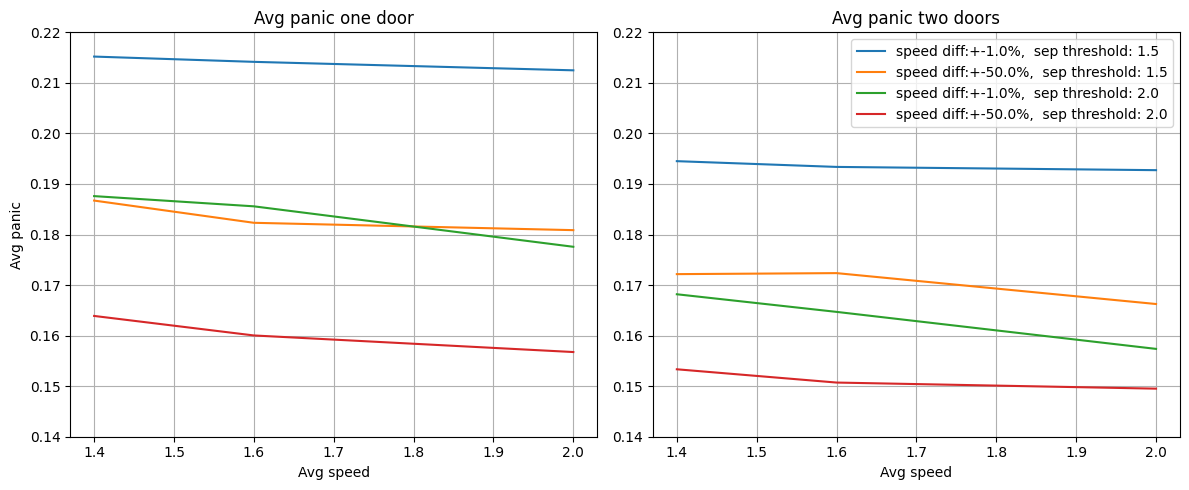

In [40]:
path1 = 'data/one_door_different_separation.csv'
path2 = 'data/two_doors_different_separation.csv'
plot_csv(path1, path2)

In [112]:
speeds = [1.2, 1.4, 1.6, 1.8, 2.0, 2.2]
sigmas = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]

for s in sigmas:
    for sp in speeds:
        print(f"{sp}, {s}, [{sp-sp*s}, {sp+sp*s}]")

1.2, 0.01, [1.188, 1.212]
1.4, 0.01, [1.386, 1.414]
1.6, 0.01, [1.584, 1.616]
1.8, 0.01, [1.782, 1.818]
2.0, 0.01, [1.98, 2.02]
2.2, 0.01, [2.1780000000000004, 2.222]
1.2, 0.1, [1.08, 1.3199999999999998]
1.4, 0.1, [1.26, 1.5399999999999998]
1.6, 0.1, [1.44, 1.7600000000000002]
1.8, 0.1, [1.62, 1.98]
2.0, 0.1, [1.8, 2.2]
2.2, 0.1, [1.9800000000000002, 2.4200000000000004]
1.2, 0.2, [0.96, 1.44]
1.4, 0.2, [1.1199999999999999, 1.68]
1.6, 0.2, [1.28, 1.9200000000000002]
1.8, 0.2, [1.44, 2.16]
2.0, 0.2, [1.6, 2.4]
2.2, 0.2, [1.7600000000000002, 2.64]
1.2, 0.3, [0.84, 1.56]
1.4, 0.3, [0.98, 1.8199999999999998]
1.6, 0.3, [1.12, 2.08]
1.8, 0.3, [1.26, 2.34]
2.0, 0.3, [1.4, 2.6]
2.2, 0.3, [1.54, 2.8600000000000003]
1.2, 0.4, [0.72, 1.68]
1.4, 0.4, [0.84, 1.96]
1.6, 0.4, [0.96, 2.24]
1.8, 0.4, [1.08, 2.52]
2.0, 0.4, [1.2, 2.8]
2.2, 0.4, [1.32, 3.08]
1.2, 0.5, [0.6, 1.7999999999999998]
1.4, 0.5, [0.7, 2.0999999999999996]
1.6, 0.5, [0.8, 2.4000000000000004]
1.8, 0.5, [0.9, 2.7]
2.0, 0.5, [1.0, 3.0]